$\mapsto$ **LINK PARA O DATASET**: [Clique Aqui!](https://www.kaggle.com/datasf/sf-library-usage-data)

# ETAPA 1: ETL

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

                   
pd.options.display.float_format = '{:,.2f}'.format      
# Formatação de valores float

In [ ]:
# DATASET: Exibir o head(5)
df = pd.read_csv('Library_Usage.csv')
df.head()

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District
0,3,SENIOR,28,13,65 to 74 years,X,Main Library,November,2012,z,email,True,2003,True,nan
1,0,ADULT,21,10,55 to 59 years,X,Main Library,October,2015,z,email,True,2003,False,nan
2,0,ADULT,275,559,60 to 64 years,X,Main Library,January,2015,z,email,True,2003,True,nan
3,0,ADULT,73,38,45 to 54 years,M8,Mission Bay,February,2016,z,email,True,2003,False,nan
4,0,ADULT,182,90,45 to 54 years,X,Main Library,July,2016,z,email,True,2003,False,nan


In [ ]:
print('Total de Linhas x Colunas: ', df.shape)
print('\nQuantidade de elementos: ', df.size)
print('\nColunas: ', df.columns)


Total de Linhas x Colunas:  (423448, 15)

Quantidade de elementos:  6351720

Colunas:  Index(['Patron Type Code', 'Patron Type Definition', 'Total Checkouts',
       'Total Renewals', 'Age Range', 'Home Library Code',
       'Home Library Definition', 'Circulation Active Month',
       'Circulation Active Year', 'Notice Preference Code',
       'Notice Preference Definition', 'Provided Email Address',
       'Year Patron Registered', 'Outside of County', 'Supervisor District'],
      dtype='object')


In [ ]:
df.drop(columns=['Patron Type Code',
                 'Provided Email Address',
                 'Notice Preference Code', 'Supervisor District',
                 'Home Library Code', 'Outside of County', 'Total Renewals'], inplace=True)
df

,Patron Type Definition,Total Checkouts,Age Range,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Definition,Year Patron Registered
0,SENIOR,28,65 to 74 years,Main Library,November,2012,email,2003
1,ADULT,21,55 to 59 years,Main Library,October,2015,email,2003
2,ADULT,275,60 to 64 years,Main Library,January,2015,email,2003
3,ADULT,73,45 to 54 years,Mission Bay,February,2016,email,2003
4,ADULT,182,45 to 54 years,Main Library,July,2016,email,2003
...,...,...,...,...,...,...,...,...
423443,ADULT,170,45 to 54 years,Main Library,August,2014,email,2008
423444,JUVENILE,4,10 to 19 years,Main Library,March,2015,email,2014
423445,ADULT,4,25 to 34 years,Main Library,January,2014,email,2011
423446,ADULT,30,20 to 24 years,Ortega,July,2016,email,2005


In [ ]:
df = df[df['Circulation Active Year']  != 'None']
df["Circulation Active Year"] = pd.to_numeric(df["Circulation Active Year"])

# Retira os anos 'None' indefinidos para fazer a conversão para int

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Descritivo breve sobre cada variável (Coluna) do seu dataset (citar a type / unidade):

In [ ]:
print('\nTipos dos dados por Coluna:\n', df.dtypes)


Tipos dos dados por Coluna:
 Patron Type Definition          object
Total Checkouts                  int64
Age Range                       object
Home Library Definition         object
Circulation Active Month        object
Circulation Active Year          int64
Notice Preference Definition    object
Year Patron Registered           int64
dtype: object


## Descritivo breve das variáveis: Quantitativas e Qualitativas do seu dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 355544 entries, 0 to 423447
Data columns (total 8 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Patron Type Definition        355544 non-null  object
 1   Total Checkouts               355544 non-null  int64 
 2   Age Range                     355415 non-null  object
 3   Home Library Definition       355544 non-null  object
 4   Circulation Active Month      355544 non-null  object
 5   Circulation Active Year       355544 non-null  int64 
 6   Notice Preference Definition  355544 non-null  object
 7   Year Patron Registered        355544 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 24.4+ MB


## Análise dos valores de sentinela

In [ ]:
#False = a coluna não está totalmente nula
df.columns.isna() 

array([False, False, False, False, False, False, False, False])

In [ ]:
#True = Existe um valor None, NaN ou NaT
df.isna()

,Patron Type Definition,Total Checkouts,Age Range,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Definition,Year Patron Registered
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
423443,False,False,False,False,False,False,False,False
423444,False,False,False,False,False,False,False,False
423445,False,False,False,False,False,False,False,False
423446,False,False,False,False,False,False,False,False


In [ ]:
#Quantidade de valores nulos por coluna
df.isna().sum() 

Patron Type Definition            0
Total Checkouts                   0
Age Range                       129
Home Library Definition           0
Circulation Active Month          0
Circulation Active Year           0
Notice Preference Definition      0
Year Patron Registered            0
dtype: int64

## Limpeza ou Preparação dos dados: valores de sentinela

In [ ]:
# Retirada dos valores Null por linha
df = df.dropna(axis=0)
df

,Patron Type Definition,Total Checkouts,Age Range,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Definition,Year Patron Registered
0,SENIOR,28,65 to 74 years,Main Library,November,2012,email,2003
1,ADULT,21,55 to 59 years,Main Library,October,2015,email,2003
2,ADULT,275,60 to 64 years,Main Library,January,2015,email,2003
3,ADULT,73,45 to 54 years,Mission Bay,February,2016,email,2003
4,ADULT,182,45 to 54 years,Main Library,July,2016,email,2003
...,...,...,...,...,...,...,...,...
423443,ADULT,170,45 to 54 years,Main Library,August,2014,email,2008
423444,JUVENILE,4,10 to 19 years,Main Library,March,2015,email,2014
423445,ADULT,4,25 to 34 years,Main Library,January,2014,email,2011
423446,ADULT,30,20 to 24 years,Ortega,July,2016,email,2005


## Análise dos valores duplicados:

In [ ]:
print('Quantidade de valores duplicados:', df.duplicated().sum())

Quantidade de valores duplicados: 32152


In [ ]:
#Dropando valores duplicados
df = df.drop_duplicates()
df

,Patron Type Definition,Total Checkouts,Age Range,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Definition,Year Patron Registered
0,SENIOR,28,65 to 74 years,Main Library,November,2012,email,2003
1,ADULT,21,55 to 59 years,Main Library,October,2015,email,2003
2,ADULT,275,60 to 64 years,Main Library,January,2015,email,2003
3,ADULT,73,45 to 54 years,Mission Bay,February,2016,email,2003
4,ADULT,182,45 to 54 years,Main Library,July,2016,email,2003
...,...,...,...,...,...,...,...,...
423441,SENIOR,3,65 to 74 years,Main Library,July,2013,phone,2011
423443,ADULT,170,45 to 54 years,Main Library,August,2014,email,2008
423444,JUVENILE,4,10 to 19 years,Main Library,March,2015,email,2014
423446,ADULT,30,20 to 24 years,Ortega,July,2016,email,2005


In [ ]:
print('Total de Linhas x Colunas após Limpeza:', df.shape)
print('\nQuantidade de elementos após Limpeza:', df.size)

Total de Linhas x Colunas após Limpeza: (323263, 8)

Quantidade de elementos após Limpeza: 2586104


## AGREGAÇÕES DE DADOS E OPERAÇÕES EM GRUPOS

In [ ]:
groupPatron = df.groupby("Patron Type Definition")["Total Checkouts"].sum()
groupPatron.sort_values(ascending=False)

#Qtd de vezes que algum livro foi alugado ordenado por tipo de usuario

Patron Type Definition
ADULT                  36861947
SENIOR                 12610193
JUVENILE               10103510
YOUNG ADULT             6833980
STAFF                    770110
SPECIAL                  300257
RETIRED STAFF            159409
TEACHER CARD             136294
AT USER ADULT             68594
WELCOME                   51311
BOOKS BY MAIL             34289
FRIENDS FOR LIFE          15939
AT USER SENIOR            14151
DIGITAL ACCESS CARD        6413
VISITOR                    6145
AT USER TEEN               4040
AT USER JUVENILE           3901
AT USER WELCOME            1182
Name: Total Checkouts, dtype: int64

In [ ]:
#Mudando os valores para não ter ambiguidade
df["Patron Type Definition"] = df["Patron Type Definition"].replace("AT USER JUVENILE", "JUVENILE")
df["Patron Type Definition"] = df["Patron Type Definition"].replace("RETIRED STAFF", "STAFF")
df["Patron Type Definition"] = df["Patron Type Definition"].replace("AT USER ADULT", "ADULT")
df["Patron Type Definition"] = df["Patron Type Definition"].replace("AT USER SENIOR", "SENIOR")
df["Patron Type Definition"] = df["Patron Type Definition"].replace("AT USER TEEN", "YOUNG ADULT")
df["Patron Type Definition"] = df["Patron Type Definition"].replace("DIGITAL ACCESS CARD", "DIGITAL ACCESS")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
#Retira os dados de acordo com a coluna e os valores (util para multiplos valores)
def filter_rows_by_values(df, col, values):
    return df[~df[col].isin(values)]

#Retirando os dados que não nos interessa
df = filter_rows_by_values(df, "Patron Type Definition", ["SPECIAL","WELCOME","FRIENDS FOR LIFE","AT USER WELCOME"])

In [ ]:
groupPatron = df.groupby("Patron Type Definition")["Total Checkouts"].sum()
groupPatron.sort_values(ascending=False)
#Qtd de vezes que algum livro foi alugado ordenado por tipo de usuario

Patron Type Definition
ADULT             36930541
SENIOR            12624344
JUVENILE          10107411
YOUNG ADULT        6838020
STAFF               929519
TEACHER CARD        136294
BOOKS BY MAIL        34289
DIGITAL ACCESS        6413
VISITOR               6145
Name: Total Checkouts, dtype: int64

In [ ]:
groupAge = df.groupby("Age Range")["Total Checkouts"].sum()
groupAge.sort_values(ascending=False)


Age Range
10 to 19 years       13918287
45 to 54 years        9984946
65 to 74 years        8762365
35 to 44 years        7347817
60 to 64 years        5288248
0 to 9 years          5092343
55 to 59 years        5088000
25 to 34 years        4461601
75 years and over     4450113
20 to 24 years        3219256
Name: Total Checkouts, dtype: int64

In [ ]:
dataframe01 = df.groupby([df['Home Library Definition'], df['Circulation Active Year']]).count()
dataframe01 = dataframe01.sort_values(by='Total Checkouts', ascending=False)
dataframe01.iloc[:, 1:2].head(10)

# Maior qtd. de vez que alguem alugou um livro de acordo com o local e ano 

Total Checkouts
Home Library Definition Circulation Active Year                 
Main Library            2016                               23882
                        2015                               16368
                        2014                               14139
                        2013                                9866
Richmond                2016                                8846
Mission                 2016                                7979
Chinatown               2016                                6953
Ortega                  2016                                6722
Sunset                  2016                                5947
West Portal             2016                                5590

# ETAPA 2: DATA EXPLORATION

## Análise dos Histogramas

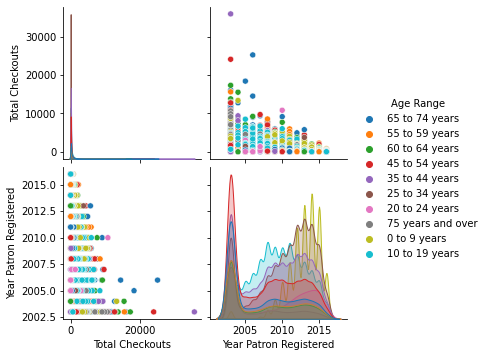

In [ ]:
# Analise dos dados do Dataset
Product = ["Total Checkouts", "Age Range", "Year Patron Registered"]
sns.pairplot(df[Product], hue = 'Age Range')

Text(0.5, 1.0, 'idades')

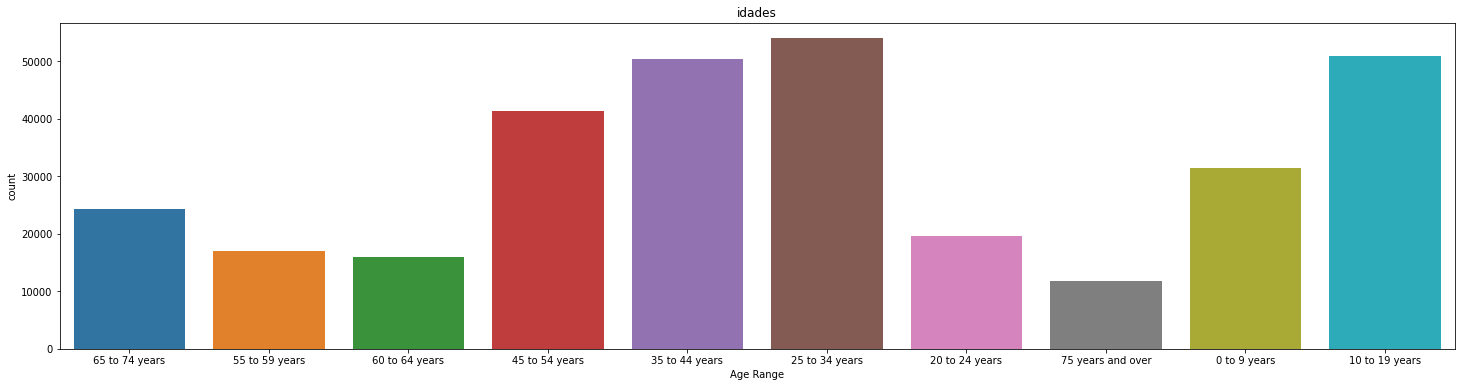

In [ ]:
plt.figure(figsize=(25,6))
ax = sns.countplot(data = df, x = 'Age Range')
plt.title("idades")

Analisando o grafico, adulto na faixa de 25/34 anos tem mais tendencia a ler livros

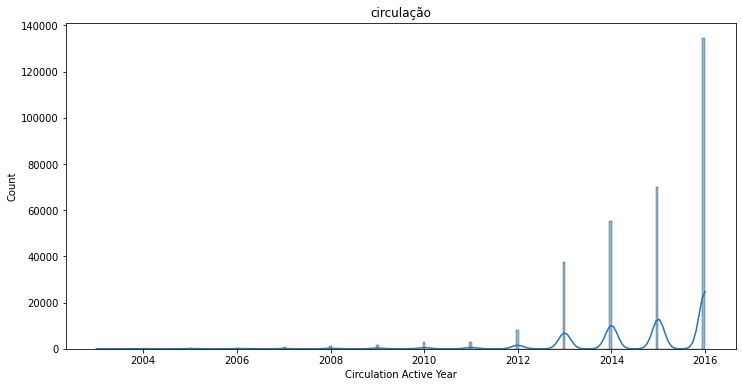

In [ ]:
plt.figure(figsize=(12,6))
plt.title('circulação')
sns.histplot(df['Circulation Active Year'] , kde=True)

podemos ver que em 2016 a circulação foi maior que os demais anos

## Análise de Correlação x Matriz de Correlação:

In [ ]:
# sns.heatmap(df1.corr())
corrMatrix = df.corr()
corrMatrix

,Total Checkouts,Circulation Active Year,Year Patron Registered
Total Checkouts,1.00,0.19,-0.32
Circulation Active Year,0.19,1.00,0.11
Year Patron Registered,-0.32,0.11,1.00


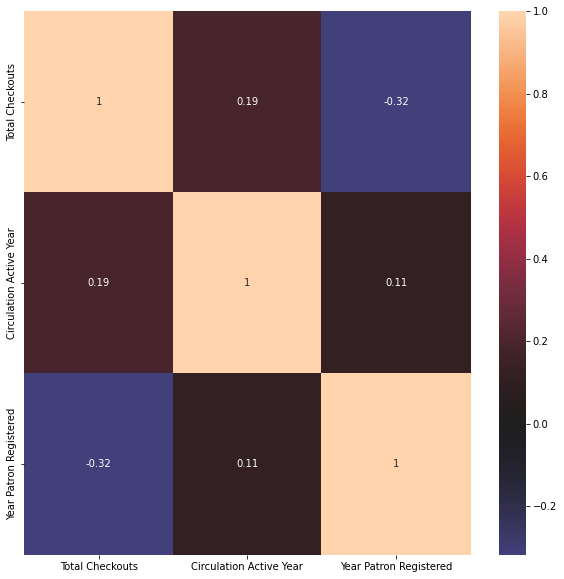

In [ ]:
plt.figure(figsize=(10,10))  
sns.heatmap(corrMatrix, annot=True, center=0)

In [ ]:
#Dados que possuem correlação comparando cada coluna(quantitativa).
corrMatrix[corrMatrix < 1].unstack().transpose()\
    .sort_values( ascending=False)\
    .drop_duplicates()

Circulation Active Year  Total Checkouts            0.19
Year Patron Registered   Circulation Active Year    0.11
                         Total Checkouts           -0.32
Total Checkouts          Total Checkouts             nan
dtype: float64

## Análise dos Boxplot: OUTLIERS

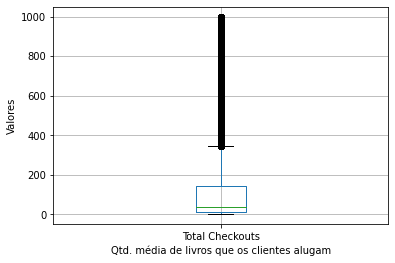

In [ ]:
boxCheckouts = df.loc[df['Total Checkouts'] < 1000]
boxCheckouts.boxplot(column=['Total Checkouts'])
plt.ylabel('Valores')
plt.xlabel('Qtd. média de livros que os clientes alugam')
plt.show()

In [ ]:
# descrição do Total Checkouts
df['Total Checkouts'].describe()

count   316,425.00
mean        213.68
std         511.63
min           0.00
25%          10.00
50%          44.00
75%         182.00
max      35,907.00
Name: Total Checkouts, dtype: float64

In [ ]:
# IQR -> variação (Q3 - Q1)
IQR = np.quantile(df['Total Checkouts'], 0.75) - np.quantile(df['Total Checkouts'], 0.25)
print(f'Box-Plot - IQR: {IQR: .2f}')

Box-Plot - IQR:  172.00


In [ ]:
minimum = np.quantile(df['Total Checkouts'], 0.25) - 1.5 * IQR
print(f'Box-Plot - MÍNIMO: {minimum: .2f}')

Box-Plot - MÍNIMO: -248.00


In [ ]:
maximum = np.quantile(df['Total Checkouts'], 0.75) + 1.5 * IQR
print(f'Box-Plot - MÁXIMO: {maximum: .2f}')

Box-Plot - MÁXIMO:  440.00


In [ ]:
index_bool_outliers = (df['Total Checkouts'] < minimum) | (df['Total Checkouts'] > maximum)
print(f'Total de Outliers: {sum(index_bool_outliers)}')

Total de Outliers: 40427


In [ ]:
#Pega o tamanho do dataframe para localizar onde estão os outliers.
index = np.arange(0, df.shape[0], 1)
index

array([     0,      1,      2, ..., 316422, 316423, 316424])

In [ ]:
#Localização dos outliers
index_outliers = index[index_bool_outliers]
index_outliers

array([     7,     10,     11, ..., 316412, 316415, 316424])

In [ ]:
df.reset_index(inplace=True)
df = df.drop(index_outliers)
df.reset_index(inplace=True)
df = df.drop(['index','level_0'], axis=1)
df

,Patron Type Definition,Total Checkouts,Age Range,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Definition,Year Patron Registered
0,SENIOR,28,65 to 74 years,Main Library,November,2012,email,2003
1,ADULT,21,55 to 59 years,Main Library,October,2015,email,2003
2,ADULT,275,60 to 64 years,Main Library,January,2015,email,2003
3,ADULT,73,45 to 54 years,Mission Bay,February,2016,email,2003
4,ADULT,182,45 to 54 years,Main Library,July,2016,email,2003
...,...,...,...,...,...,...,...,...
275993,TEACHER CARD,12,55 to 59 years,Merced,April,2016,email,2015
275994,SENIOR,3,65 to 74 years,Main Library,July,2013,phone,2011
275995,ADULT,170,45 to 54 years,Main Library,August,2014,email,2008
275996,JUVENILE,4,10 to 19 years,Main Library,March,2015,email,2014


## Análise dos DOTPLOT: Análise de Correlação

/usr/local/lib/python3.7/dist-packages/google/colab/_event_manager.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


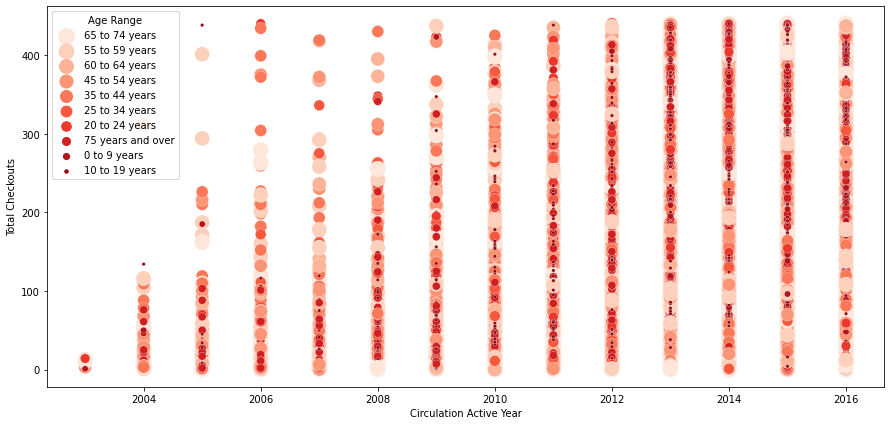

In [ ]:
#dotPLOT
f, ax = plt.subplots(figsize=(15, 7))
sns.scatterplot(x="Circulation Active Year", y="Total Checkouts", palette="Reds", size="Age Range", sizes=(12,250), hue='Age Range', data=df);

## Mapeamento das variáveis QUALITATIVAS para QUANTITATIVAS:


Das variáveis Qualitativas (STRINGS) que PERMANECEREM como importantes no seu DATASET para a ETAPA: Machine Learning, fazer o MAPEAMENTO: STRINGS para INT.

Contar a unicidade das Variáveis Qualitativas do seu Dataset:

In [ ]:
df.select_dtypes(include=object)

,Patron Type Definition,Age Range,Home Library Definition,Circulation Active Month,Notice Preference Definition
0,SENIOR,65 to 74 years,Main Library,November,email
1,ADULT,55 to 59 years,Main Library,October,email
2,ADULT,60 to 64 years,Main Library,January,email
3,ADULT,45 to 54 years,Mission Bay,February,email
4,ADULT,45 to 54 years,Main Library,July,email
...,...,...,...,...,...
275993,TEACHER CARD,55 to 59 years,Merced,April,email
275994,SENIOR,65 to 74 years,Main Library,July,phone
275995,ADULT,45 to 54 years,Main Library,August,email
275996,JUVENILE,10 to 19 years,Main Library,March,email


In [ ]:
#Dropando a coluna (não acrescenta em nada na análise) 
df = df.drop(axis=1, columns=['Notice Preference Definition'])

In [ ]:
df['Patron Type Definition'].value_counts()

ADULT             182139
JUVENILE           45010
SENIOR             27013
YOUNG ADULT        19173
TEACHER CARD        1520
STAFF                443
VISITOR              376
DIGITAL ACCESS       261
BOOKS BY MAIL         63
Name: Patron Type Definition, dtype: int64

In [ ]:
df['Age Range'].value_counts()

25 to 34 years       52054
35 to 44 years       46372
10 to 19 years       41315
45 to 54 years       35469
0 to 9 years         28448
65 to 74 years       19038
20 to 24 years       17468
55 to 59 years       13897
60 to 64 years       12862
75 years and over     9075
Name: Age Range, dtype: int64

In [ ]:
df['Home Library Definition'].value_counts()

Main Library                          63244
Mission                               18608
Richmond                              15649
Excelsior                             12570
Chinatown                             11533
Sunset                                10568
Ortega                                10199
West Portal                           10012
Marina                                 7622
Ingleside                              7567
Glen Park                              7394
Merced                                 7317
Mission Bay                            7263
Bernal Heights                         7258
Parkside                               6996
Western Addition                       6874
Noe Valley/Sally Brunn                 6391
Portola                                6264
Eureka Valley/Harvey Milk Memorial     6245
Presidio                               6191
North Beach                            6130
Bayview/Linda Brooks-Burton            6108
Park                            

In [ ]:
df['Circulation Active Month'].value_counts()

July         60332
June         32183
May          25605
April        20727
March        19854
August       18246
January      17035
September    16807
December     16776
February     16466
October      16058
November     15909
Name: Circulation Active Month, dtype: int64

TRANSFORMAR AS QUALITATIVAS para QUANTITATIVAS: por Indexação Booleana(MASK)

In [ ]:
df_final = df

In [ ]:
#Preparação para utilizar no machine learning(quantitativo)
#Transformar strings em numeros
categorical_columns = df_final.select_dtypes(['object']).columns
categorical_columns

Index(['Patron Type Definition', 'Age Range', 'Home Library Definition',
       'Circulation Active Month'],
      dtype='object')

In [ ]:
df_final['Patron Type Definition'] = df_final['Patron Type Definition'].astype('category')
df_final['Age Range'] = df_final['Age Range'].astype('category')
df_final['Home Library Definition'] = df_final['Home Library Definition'].astype('category')
df_final['Circulation Active Month'] = df_final['Circulation Active Month'].astype('category')

In [ ]:
#Dataframe final com os valores substituidos.
df_final[categorical_columns] = df_final[categorical_columns].apply(lambda x: x.cat.codes)
df_final

,Patron Type Definition,Total Checkouts,Age Range,Home Library Definition,Circulation Active Month,Circulation Active Year,Year Patron Registered
0,4,28,8,15,9,2012,2003
1,0,21,6,15,10,2015,2003
2,0,275,7,15,4,2015,2003
3,0,73,5,19,3,2016,2003
4,0,182,5,15,5,2016,2003
...,...,...,...,...,...,...,...
275993,6,12,6,17,0,2016,2015
275994,4,3,8,15,5,2013,2011
275995,0,170,5,15,1,2014,2008
275996,3,4,1,15,7,2015,2014


In [ ]:
# Pega uma amostra do dataset (caso ele seja muito grande)
db_final = df_final.sample(frac = 0.05)
db_final

,Patron Type Definition,Total Checkouts,Age Range,Home Library Definition,Circulation Active Month,Circulation Active Year,Year Patron Registered
272469,8,25,1,27,6,2016,2016
171464,0,178,4,15,4,2014,2010
274133,3,387,0,29,5,2016,2011
122584,0,4,2,34,8,2014,2013
119623,0,23,3,10,5,2013,2012
...,...,...,...,...,...,...,...
189230,0,23,7,29,5,2014,2004
227172,4,72,9,16,9,2015,2004
41397,0,128,5,23,1,2015,2011
212049,3,125,1,28,3,2016,2014


##CLASSIFICADOR

Será que podemos descobrir para onde o cliente vai (local) de acordo com sua idade?

In [ ]:
from sklearn.model_selection import train_test_split
from numpy import random

# Valores aleatorios para teste
SEED = 123143
random.seed(SEED)

# Treinamento do Classificador (X,y)
treino_x, teste_x, treino_y, teste_y = train_test_split(db_final, db_final['Home Library Definition'], test_size=0.3)

In [ ]:
treino_x.head()

,Patron Type Definition,Total Checkouts,Age Range,Home Library Definition,Circulation Active Month,Circulation Active Year,Year Patron Registered
247381,8,37,1,7,7,2015,2012
115217,4,91,8,8,10,2014,2008
172701,0,11,5,15,7,2014,2014
265231,3,46,0,16,6,2014,2012
86676,0,15,3,34,8,2014,2012


In [ ]:
db_final['Home Library Definition'].value_counts()

15    3252
18     885
29     804
10     623
8      598
30     536
23     485
33     471
19     385
13     380
11     379
16     374
34     359
25     335
1      333
17     332
28     325
9      322
2      317
21     316
26     305
20     304
24     279
0      277
27     245
32     225
12     143
22     118
31      47
7       29
14      13
6        3
3        1
Name: Home Library Definition, dtype: int64

In [ ]:
db_final['Age Range'].value_counts()

3    2554
4    2401
1    2053
5    1745
0    1406
8    1013
2     890
7     660
6     650
9     428
Name: Age Range, dtype: int64

In [ ]:
treino_y.head()

247381     7
115217     8
172701    15
265231    16
86676     34
Name: Home Library Definition, dtype: int8

In [ ]:
# Modelo 1: RandomForestClassifier
# Um Random Forest é um estimador que ajusta vários classificadores 
# de árvore de decisão em várias subamostras do conjunto de dados e usa a média 
# para melhorar a precisão preditiva e o sobreajuste de controle.

from sklearn.ensemble import RandomForestClassifier

classificador = RandomForestClassifier(n_estimators = 100)
classificador.fit(treino_x, treino_y)
print('Acuracia(precisão):', classificador.score(teste_x, teste_y))

Acuracia(precisão): 0.9193236714975845


In [ ]:
# Modelo 2: DummyClassifier
# Este classificador é útil como testador para comparar com 
# outros classificadores (reais). Não o use para problemas reais.
from sklearn.dummy import DummyClassifier


classificador_dummy = DummyClassifier(strategy= "most_frequent")
classificador_dummy.fit(treino_x, treino_y)
print('Acuracia(precisão):', classificador_dummy.score(teste_x, teste_y))

Acuracia(precisão): 0.24033816425120774


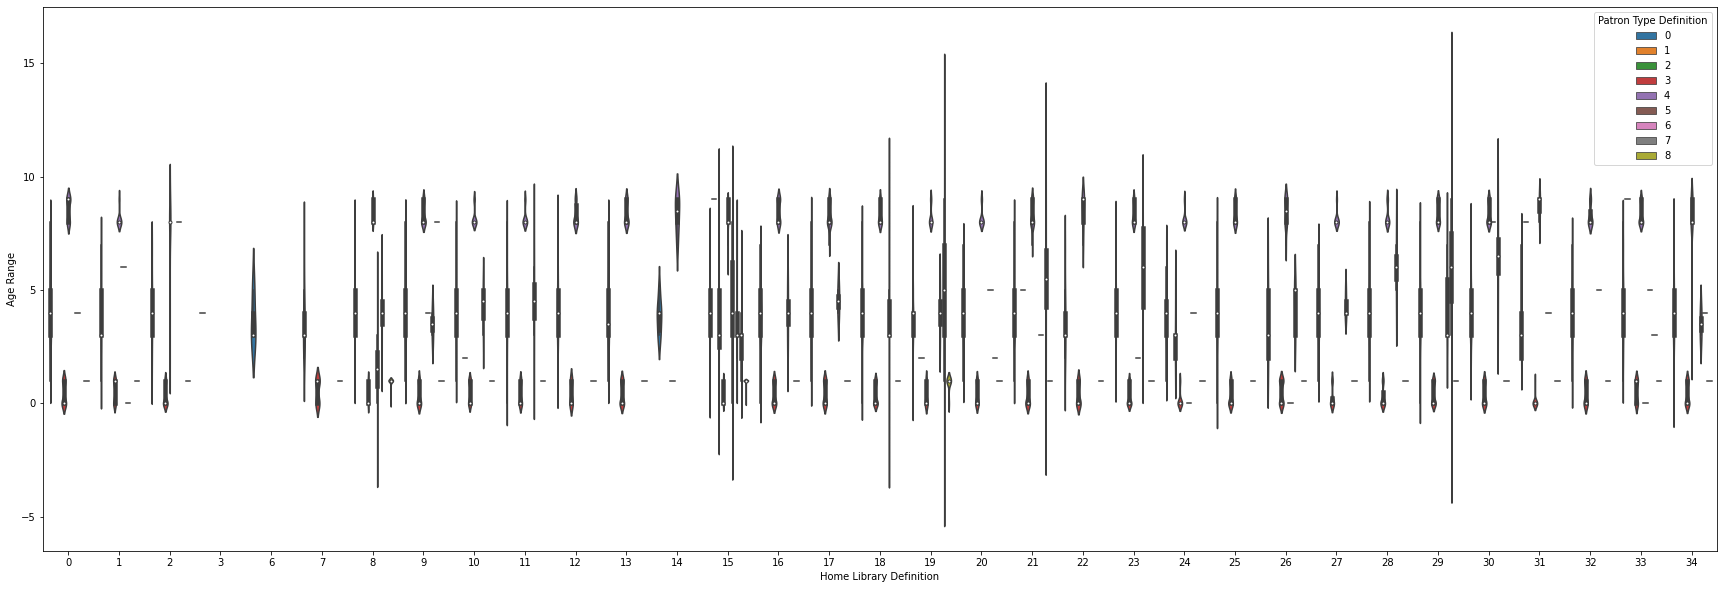

In [ ]:
#Violin Plot
from sklearn.preprocessing import StandardScaler

# padronizador = StandardScaler()
# padronizador.fit(db_final)
# padronizador.transform(db_final)

# db_final['Home Library Definition'] = db_final['Home Library Definition'].iloc[:,0:10]

plt.figure(figsize=(30,10))
sns.violinplot(x='Home Library Definition', y='Age Range',hue='Patron Type Definition', data=db_final)
# Nosso violino não tem ondas pois temos apenas valores inteiros

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

selection_kbest = SelectKBest(chi2, k = 3) #k é o numero de features que queremos
selection_kbest.fit(treino_x, treino_y)

treino_x_kbest = selection_kbest.transform(treino_x)
teste_x_kbest = selection_kbest.transform(teste_x)

In [ ]:
treino_x_kbest.shape

(9660, 3)

In [ ]:
teste_x_kbest.shape

(4140, 3)

In [ ]:
# Classificando com os melhores dados e features

# Valores aleatorios para teste
SEED = 1234
random.seed(SEED)

classificador = RandomForestClassifier(n_estimators = 100, random_state=1234)
classificador.fit(treino_x_kbest, treino_y)
print('Acuracia(precisão):', classificador.score(teste_x_kbest, teste_y))

Acuracia(precisão): 0.9676328502415459


In [ ]:
# Matriz de Confusão
from sklearn.metrics import confusion_matrix

matrix_c = confusion_matrix(teste_y, classificador.predict(teste_x_kbest))
matrix_c

array([[ 80,   1,   0, ...,   0,   0,   0],
       [  2,  97,   1, ...,   0,   0,   0],
       [  0,   0,  95, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,  56,   1,   0],
       [  0,   0,   0, ...,   0, 122,   0],
       [  0,   0,   0, ...,   0,   0, 101]])

[Text(246.5, 0.5, 'Real'), Text(0.5, 246.5, 'Predição')]

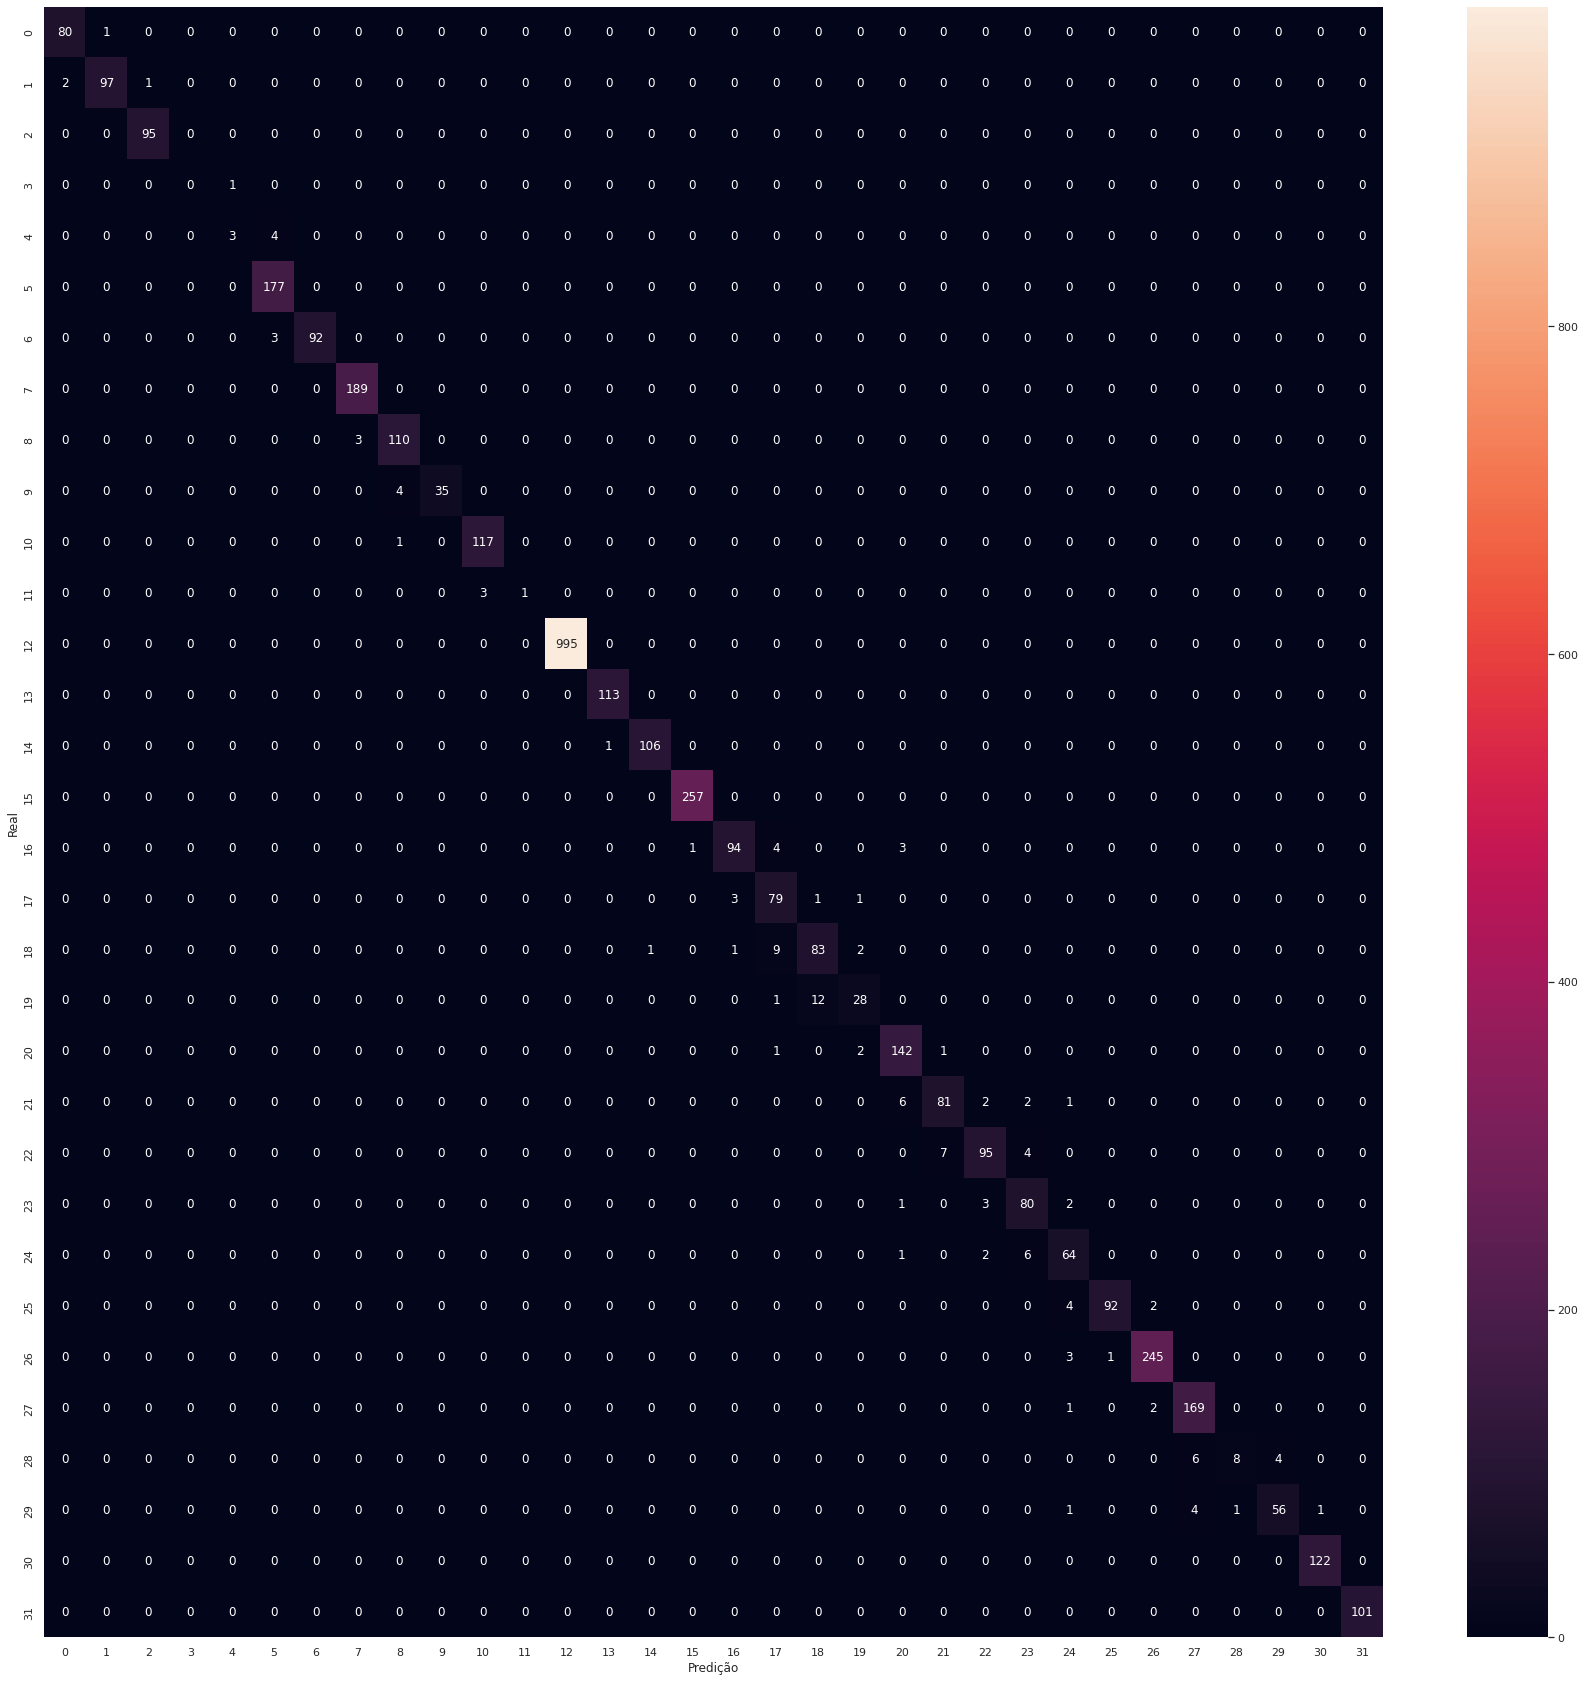

In [ ]:
plt.figure(figsize=(30,30))
sns.set()
sns.heatmap(matrix_c, annot=True, fmt='d').set(xlabel='Predição', ylabel= 'Real')

# Cada coluna/linha representa um local onde pode ser alugado um livro
# Cada linha se somada, representa a qtd total de pessoas que frequenta esse local
# O valor da coluna [x,x] representa a prediçao correta, e os demais blocos representam o contrario

In [ ]:
#Usando RFE para selecionar as melhores features dos nossos dados

from sklearn.feature_selection import RFE

SEED = 1234
random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(db_final, 
                                                        db_final['Home Library Definition'], test_size=0.3)

classificador = RandomForestClassifier(n_estimators = 100, random_state=1234)
classificador.fit(treino_x, treino_y)
rfe_selection = RFE(estimator= classificador, n_features_to_select=2, step=1)
rfe_selection.fit(treino_x, treino_y)

#Output = novos dados 
treino_rfe = rfe_selection.transform(treino_x)
teste_rfe = rfe_selection.transform(teste_x)

# Nova acuracia usando RFE
classificador.fit(treino_rfe, treino_y)
print('Acuracia(precisão):', classificador.score(teste_rfe, teste_y))


Acuracia(precisão): 0.9958937198067633


[Text(246.5, 0.5, 'Real'), Text(0.5, 246.5, 'Predição')]

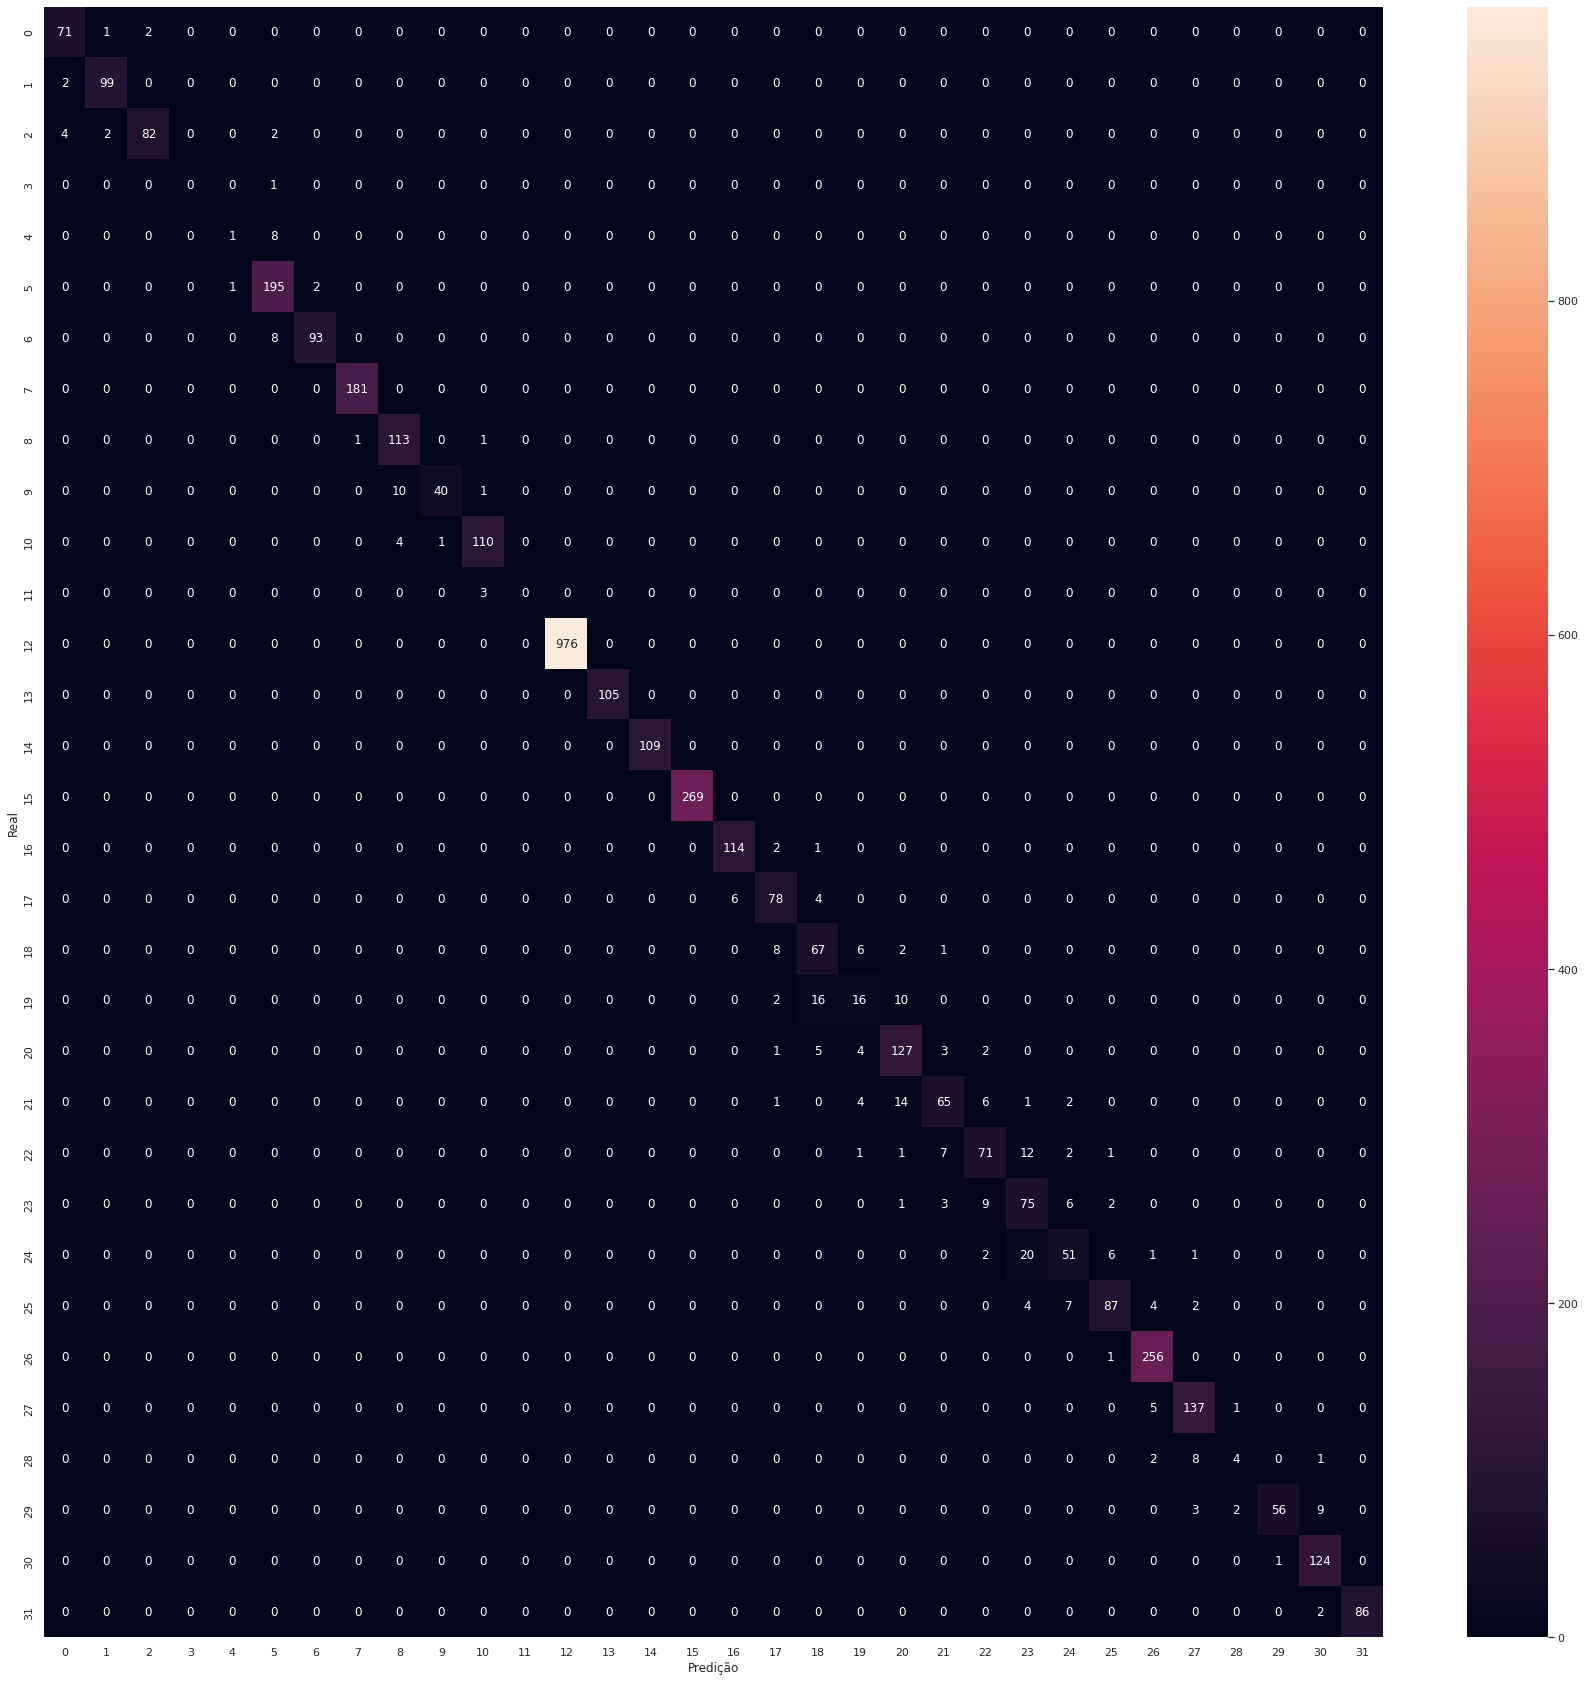

In [ ]:
#Matriz de Correlação usando os dados do RFE
matrix_c = confusion_matrix(teste_y, classificador.predict(teste_rfe))
plt.figure(figsize=(30,30))
sns.set()
sns.heatmap(matrix_c, annot=True, fmt='d').set(xlabel='Predição', ylabel= 'Real')

#Podemos ver que usando o SelectKbest os dados tiveram maior acuracia em comparação ao RFE

In [ ]:
# O RFECV divide o nosso banco de dados em blocos e aplica o algoritmo RFE. 
# Dessa forma, O RFECV não só nos informa quantas features precisamos ter para 
# gerar o melhor resultado possível, como também quais features são essas.

from sklearn.feature_selection import RFECV

SEED = 1234
random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(db_final, 
                                                        db_final['Home Library Definition'], test_size=0.3)

classificador = RandomForestClassifier(n_estimators = 100, random_state=1234)
classificador.fit(treino_x, treino_y)
rfecv_selection = RFECV(estimator= classificador, cv=6, step=1, scoring="accuracy")
rfecv_selection.fit(treino_x, treino_y)

#Output = novos dados 
treino_rfecv = rfecv_selection.transform(treino_x)
teste_rfecv = rfecv_selection.transform(teste_x)

# Nova acuracia usando RFE
classificador.fit(treino_rfecv, treino_y)
print('Acuracia(precisão):', classificador.score(teste_rfecv, teste_y))


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  "X does not have valid feature names, but"


Acuracia(precisão): 1.0


[Text(246.5, 0.5, 'Real'), Text(0.5, 246.5, 'Predição')]

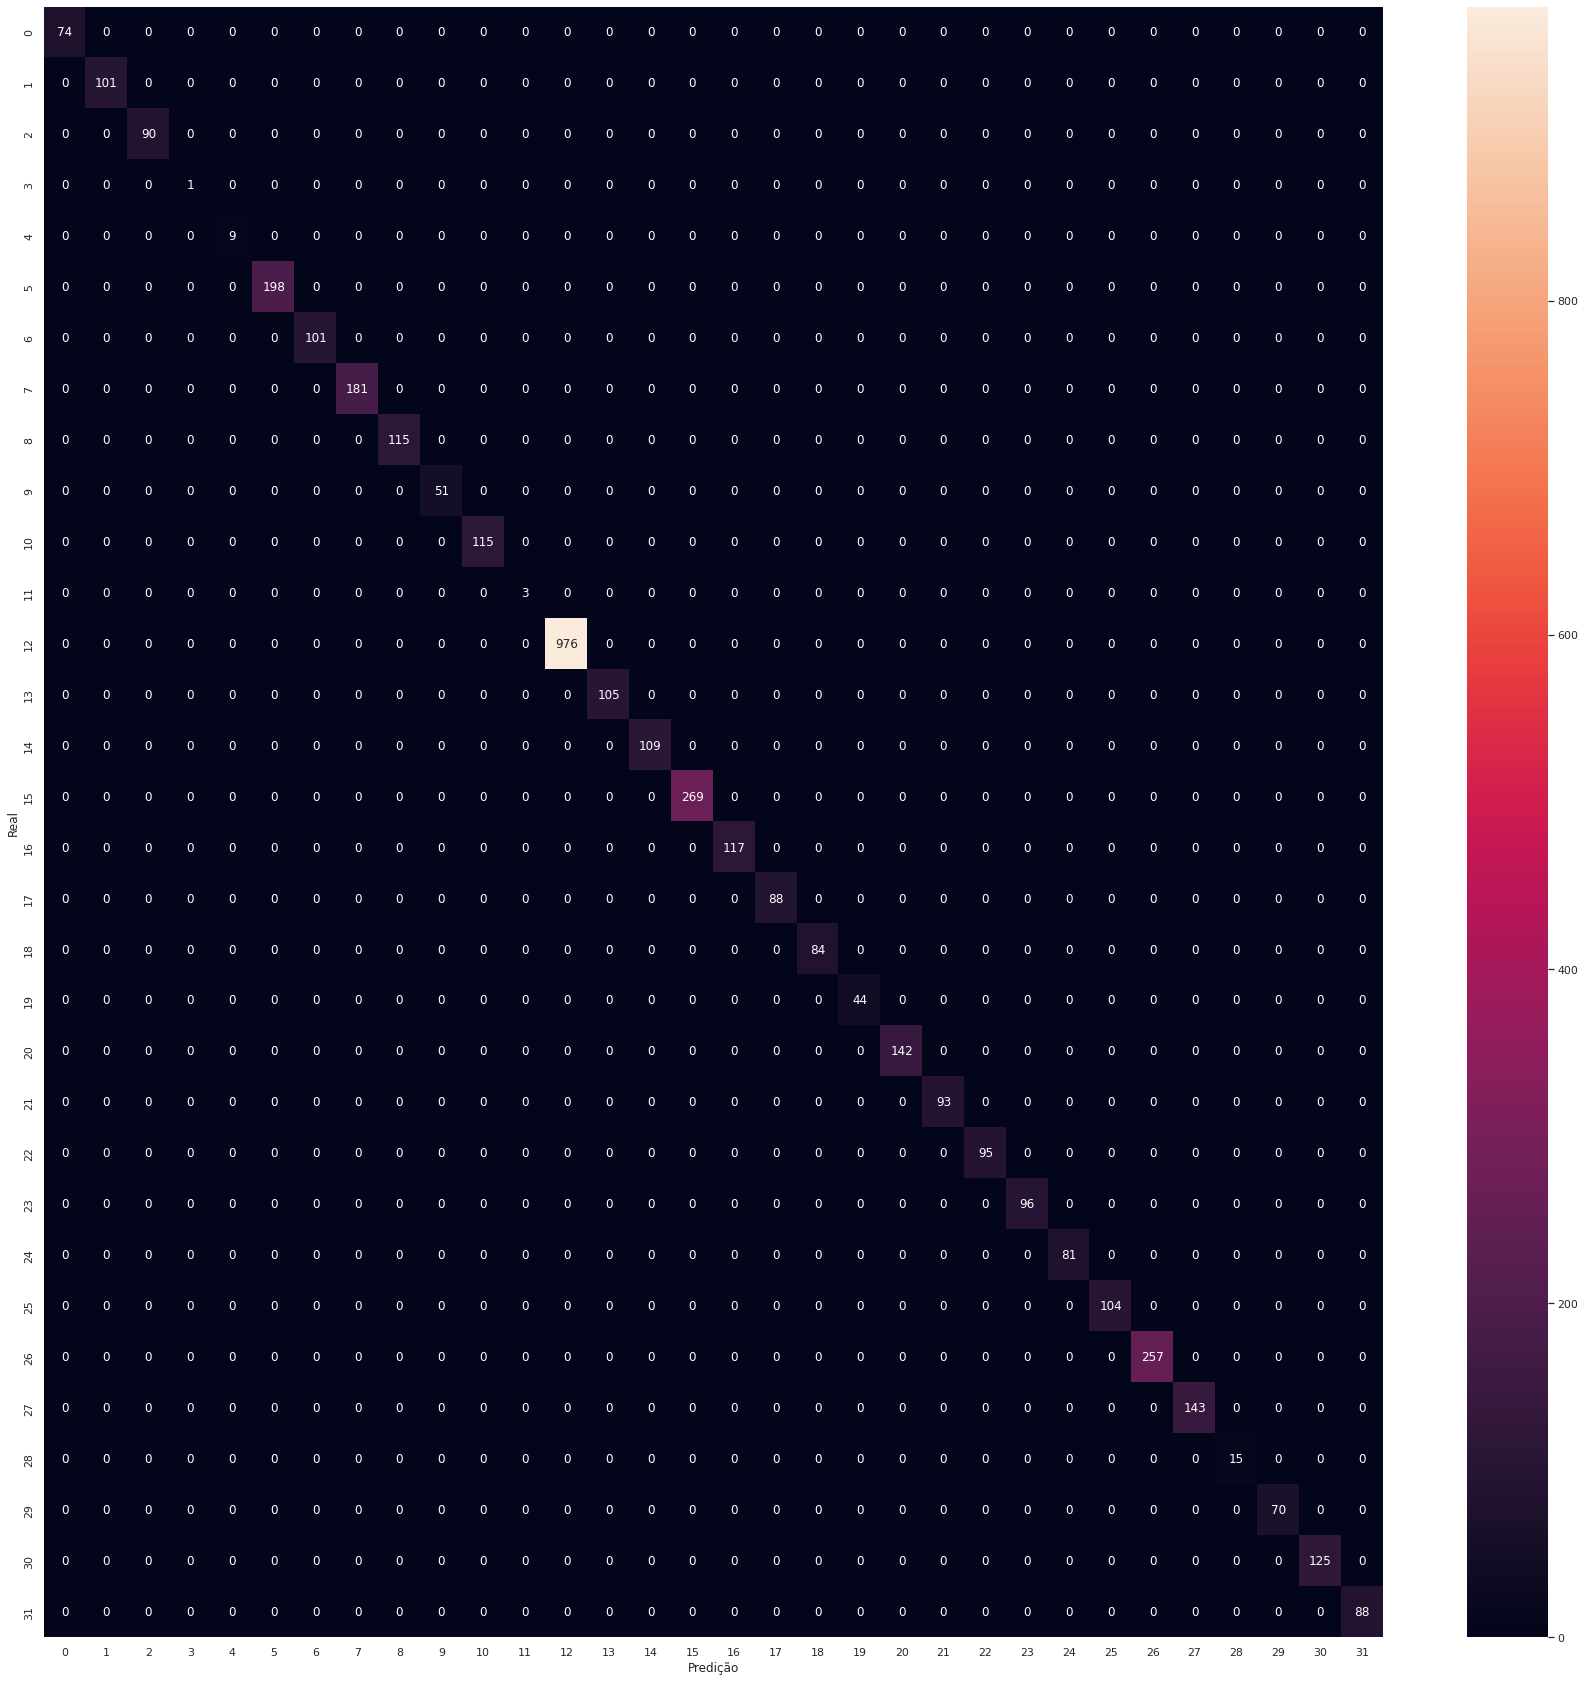

In [ ]:
#Matriz de Correlação usando os dados do RFECV
matrix_c = confusion_matrix(teste_y, classificador.predict(teste_rfecv))
plt.figure(figsize=(30,30))
sns.set()
sns.heatmap(matrix_c, annot=True, fmt='d').set(xlabel='Predição', ylabel= 'Real')

#Podemos ver que usando o RFECV os dados tiveram maior acuracia em comparação ao RFE e SelectKbest

In [ ]:
#Qtd de features escolhidas
print('Qtd de features escolhidas:', rfecv_selection.n_features_)
print('Features escolhidas: ', treino_x.columns[rfecv_selection.support_])
print('Score de cada feature: ', rfecv_selection.grid_scores_)

Qtd de features escolhidas: 1
Features escolhidas:  Index(['Home Library Definition'], dtype='object')
Score de cada feature:  [[1.         1.         1.         1.         1.         0.99937888]
 [0.9931677  0.99130435 0.99068323 0.99440994 0.99192547 0.99565217]
 [0.93850932 0.93478261 0.94285714 0.94161491 0.92608696 0.94037267]
 [0.99254658 0.99440994 0.99565217 0.99689441 0.9931677  0.9931677 ]
 [0.98074534 0.98136646 0.97639752 0.97826087 0.98136646 0.98012422]
 [0.95838509 0.95652174 0.95962733 0.94906832 0.94658385 0.95341615]
 [0.91925466 0.9        0.91614907 0.90869565 0.89378882 0.91304348]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


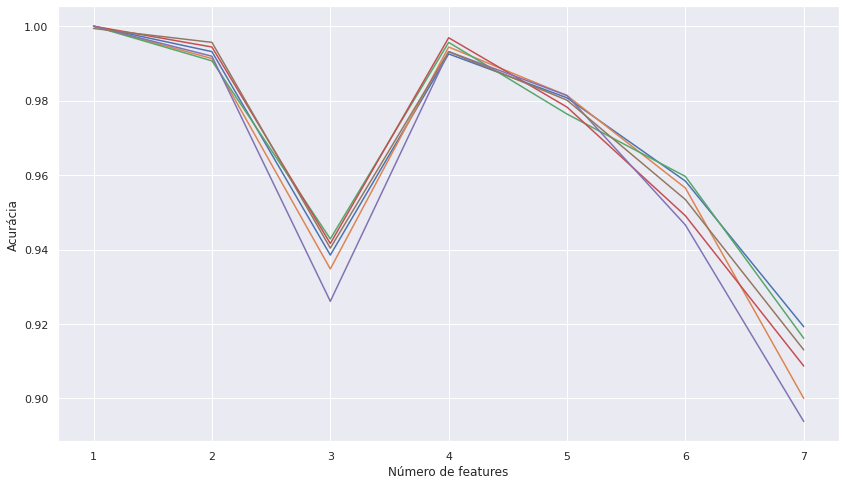

In [ ]:
#Motivo de escolha das features

plt.figure(figsize = (14,8))
plt.xlabel('Número de features')
plt.ylabel('Acurácia')
plt.plot(range(1, len(rfecv_selection.grid_scores_) + 1), rfecv_selection.grid_scores_)
plt.show()

#Os valores são uma média 
# As features Patron Type Definition, Total Checkouts	e Library Definition tiveram valores otimos

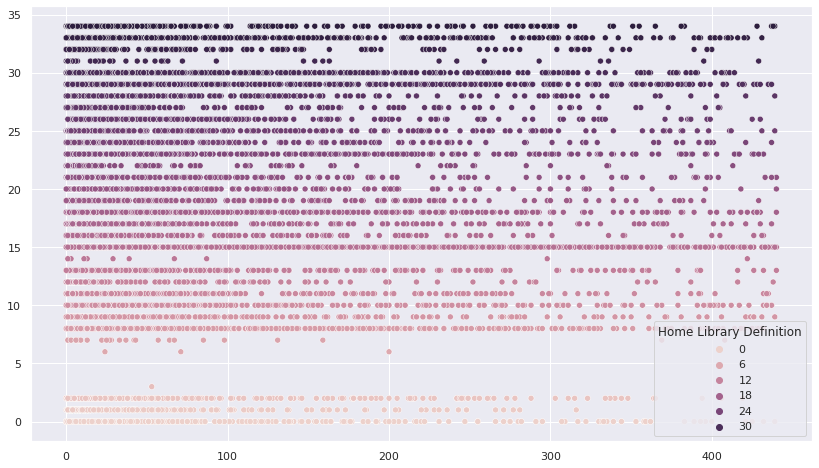

In [ ]:
#Visualização dos valores(FeatureSelection) em um grafico
#FeatureSelection = filtro de principais features
valores_finais = rfe_selection.transform(db_final)
valores_finais.shape

plt.figure(figsize=(14,8))
sns.scatterplot(x= valores_finais[:,0], y=valores_finais[:,1], hue=db_final['Home Library Definition'])

# Podemos perceber que das duas features escolhidas, a do eixo x foi a Total Checkouts.
# Tambem podemos perceber que perdemos alguns dados pois o nosso grafico 
# tem apenas duas dimensoes Home Library Definition e Total Checkouts.


In [ ]:
#Mantendo a maior qtd de dados possiveis usando PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
valores_finais02 = pca.fit_transform(db_final)
valores_finais02

array([[-50.3628272 ,  -9.09568015],
       [102.6538727 ,   3.47395721],
       [311.66091291,  -9.9689324 ],
       ...,
       [ 52.67488166,  -4.67892265],
       [ 49.64832221,  -9.75808325],
       [-72.35620091,  -7.09951157]])

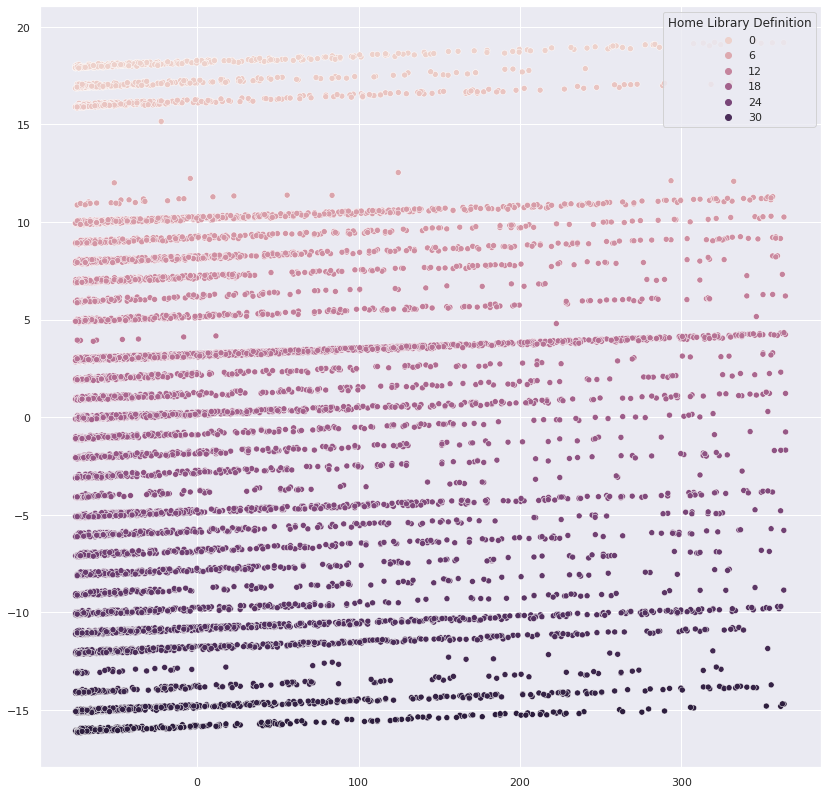

In [ ]:
#Plotando os dados com o PCA
plt.figure(figsize=(14,14))
sns.scatterplot(x= valores_finais02[:,0], y=valores_finais02[:,1], hue=db_final['Home Library Definition'])


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


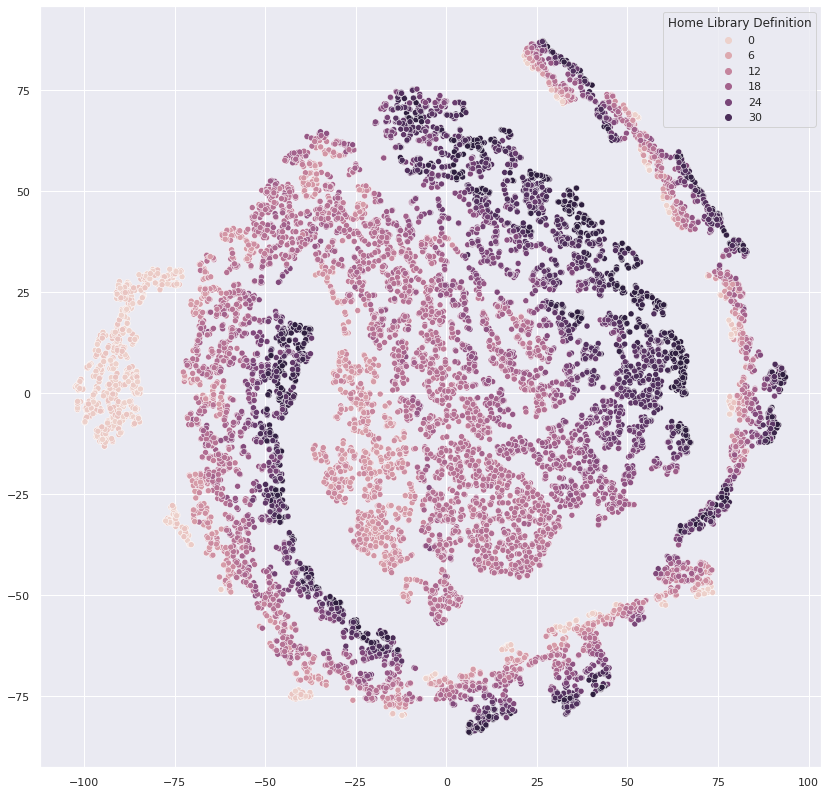

In [ ]:
#O t-SNE tenta manter a proporção dessas distâncias na redução para dimensões 
# menores, permitindo que tenhamos uma noção de quão distante um ponto está do outro.
# tsne = redução de dimensionalidade
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
valores_finais03 = tsne.fit_transform(db_final)
plt.figure(figsize=(14,14))
sns.scatterplot(x= valores_finais03[:,0], y=valores_finais03[:,1], hue=db_final['Home Library Definition'])
plt.show()

# O centro tenta manter a maior concetração de dados

In [ ]:
# while True:
#   option = int(input('Sua Opção: '))
#   if option == 0:
#     break
# Amostra nova por Simulação: sample [x0,	x1,	x2,	x3, x4, x5, x6]
x0 = np.random.normal(db_final.iloc[:,0].mean(), db_final.iloc[:,0].std(), 1)
x1 = np.random.normal(db_final.iloc[:, 1].mean(), db_final.iloc[:, 1].std(), 1)
x2 = np.random.normal(db_final.iloc[:, 2].mean(), db_final.iloc[:, 2].std(), 1)
x3 = np.random.normal(db_final.iloc[:, 3].mean(), db_final.iloc[:, 3].std(), 1)
x4 = np.random.normal(db_final.iloc[:, 4].mean(), db_final.iloc[:, 4].std(), 1)
x5 = np.random.normal(db_final.iloc[:, 5].mean(), db_final.iloc[:, 5].std(), 1)
x6 = np.random.normal(db_final.iloc[:, 6].mean(), db_final.iloc[:, 6].std(), 1)

# Amostra nova por Simulação: sample1
sample = np.array([x0,	x1,	x2,	x3, x4, x5, x6])

# Amostra nova: sample1 aplicado ao RFECV
y = rfecv_selection.predict(sample.reshape(1, -1))
amostra = y[0]
print(amostra)
print([x0,	x1,	x2,	x3, x4, x5, x6])

34
[array([-1.93350929]), array([281.76779073]), array([4.10062542]), array([33.54815006]), array([4.52954602]), array([2016.88885529]), array([2007.41516379])]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  "X does not have valid feature names, but"
